In [1]:
import logging
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [3]:
VAE_flows_ecto_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_forward_12hpf.h5ad")
VAE_flows_ecto_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_ecto_backward_5.3hpf_.h5ad")
VAE_flows_meso_b = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_meso_endo_backward_12hpf_.h5ad")
VAE_flows_meso_f = sc.read_h5ad("/home/gaurav/Gaurav/Berlin/Deep_Learning/Project/models/NB_MMD/Objects/Zebrafish/adata_meso_endo_forward_12hpf_.h5ad")


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.1, .9), xycoords=ax.transAxes)

def Plotting_Correlation_genes(data_object,title):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o")
    major_ticks = np.arange(0, 100,20)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(-10,80) 
    plt.ylim(-10,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(" ",fontsize = 20)
    plt.ylabel(" ",fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()
    
def Plotting_Correlation_var(data_object,title):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o")
    major_ticks = np.arange(0, 40,10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    sns.despine(offset=2)
    plt.xlim(-1,25) 
    plt.ylim(-1,25)
    plt.grid(False)
    plt.xlabel(" ",fontsize = 20)
    plt.ylabel(" ",fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)
    plt.show()

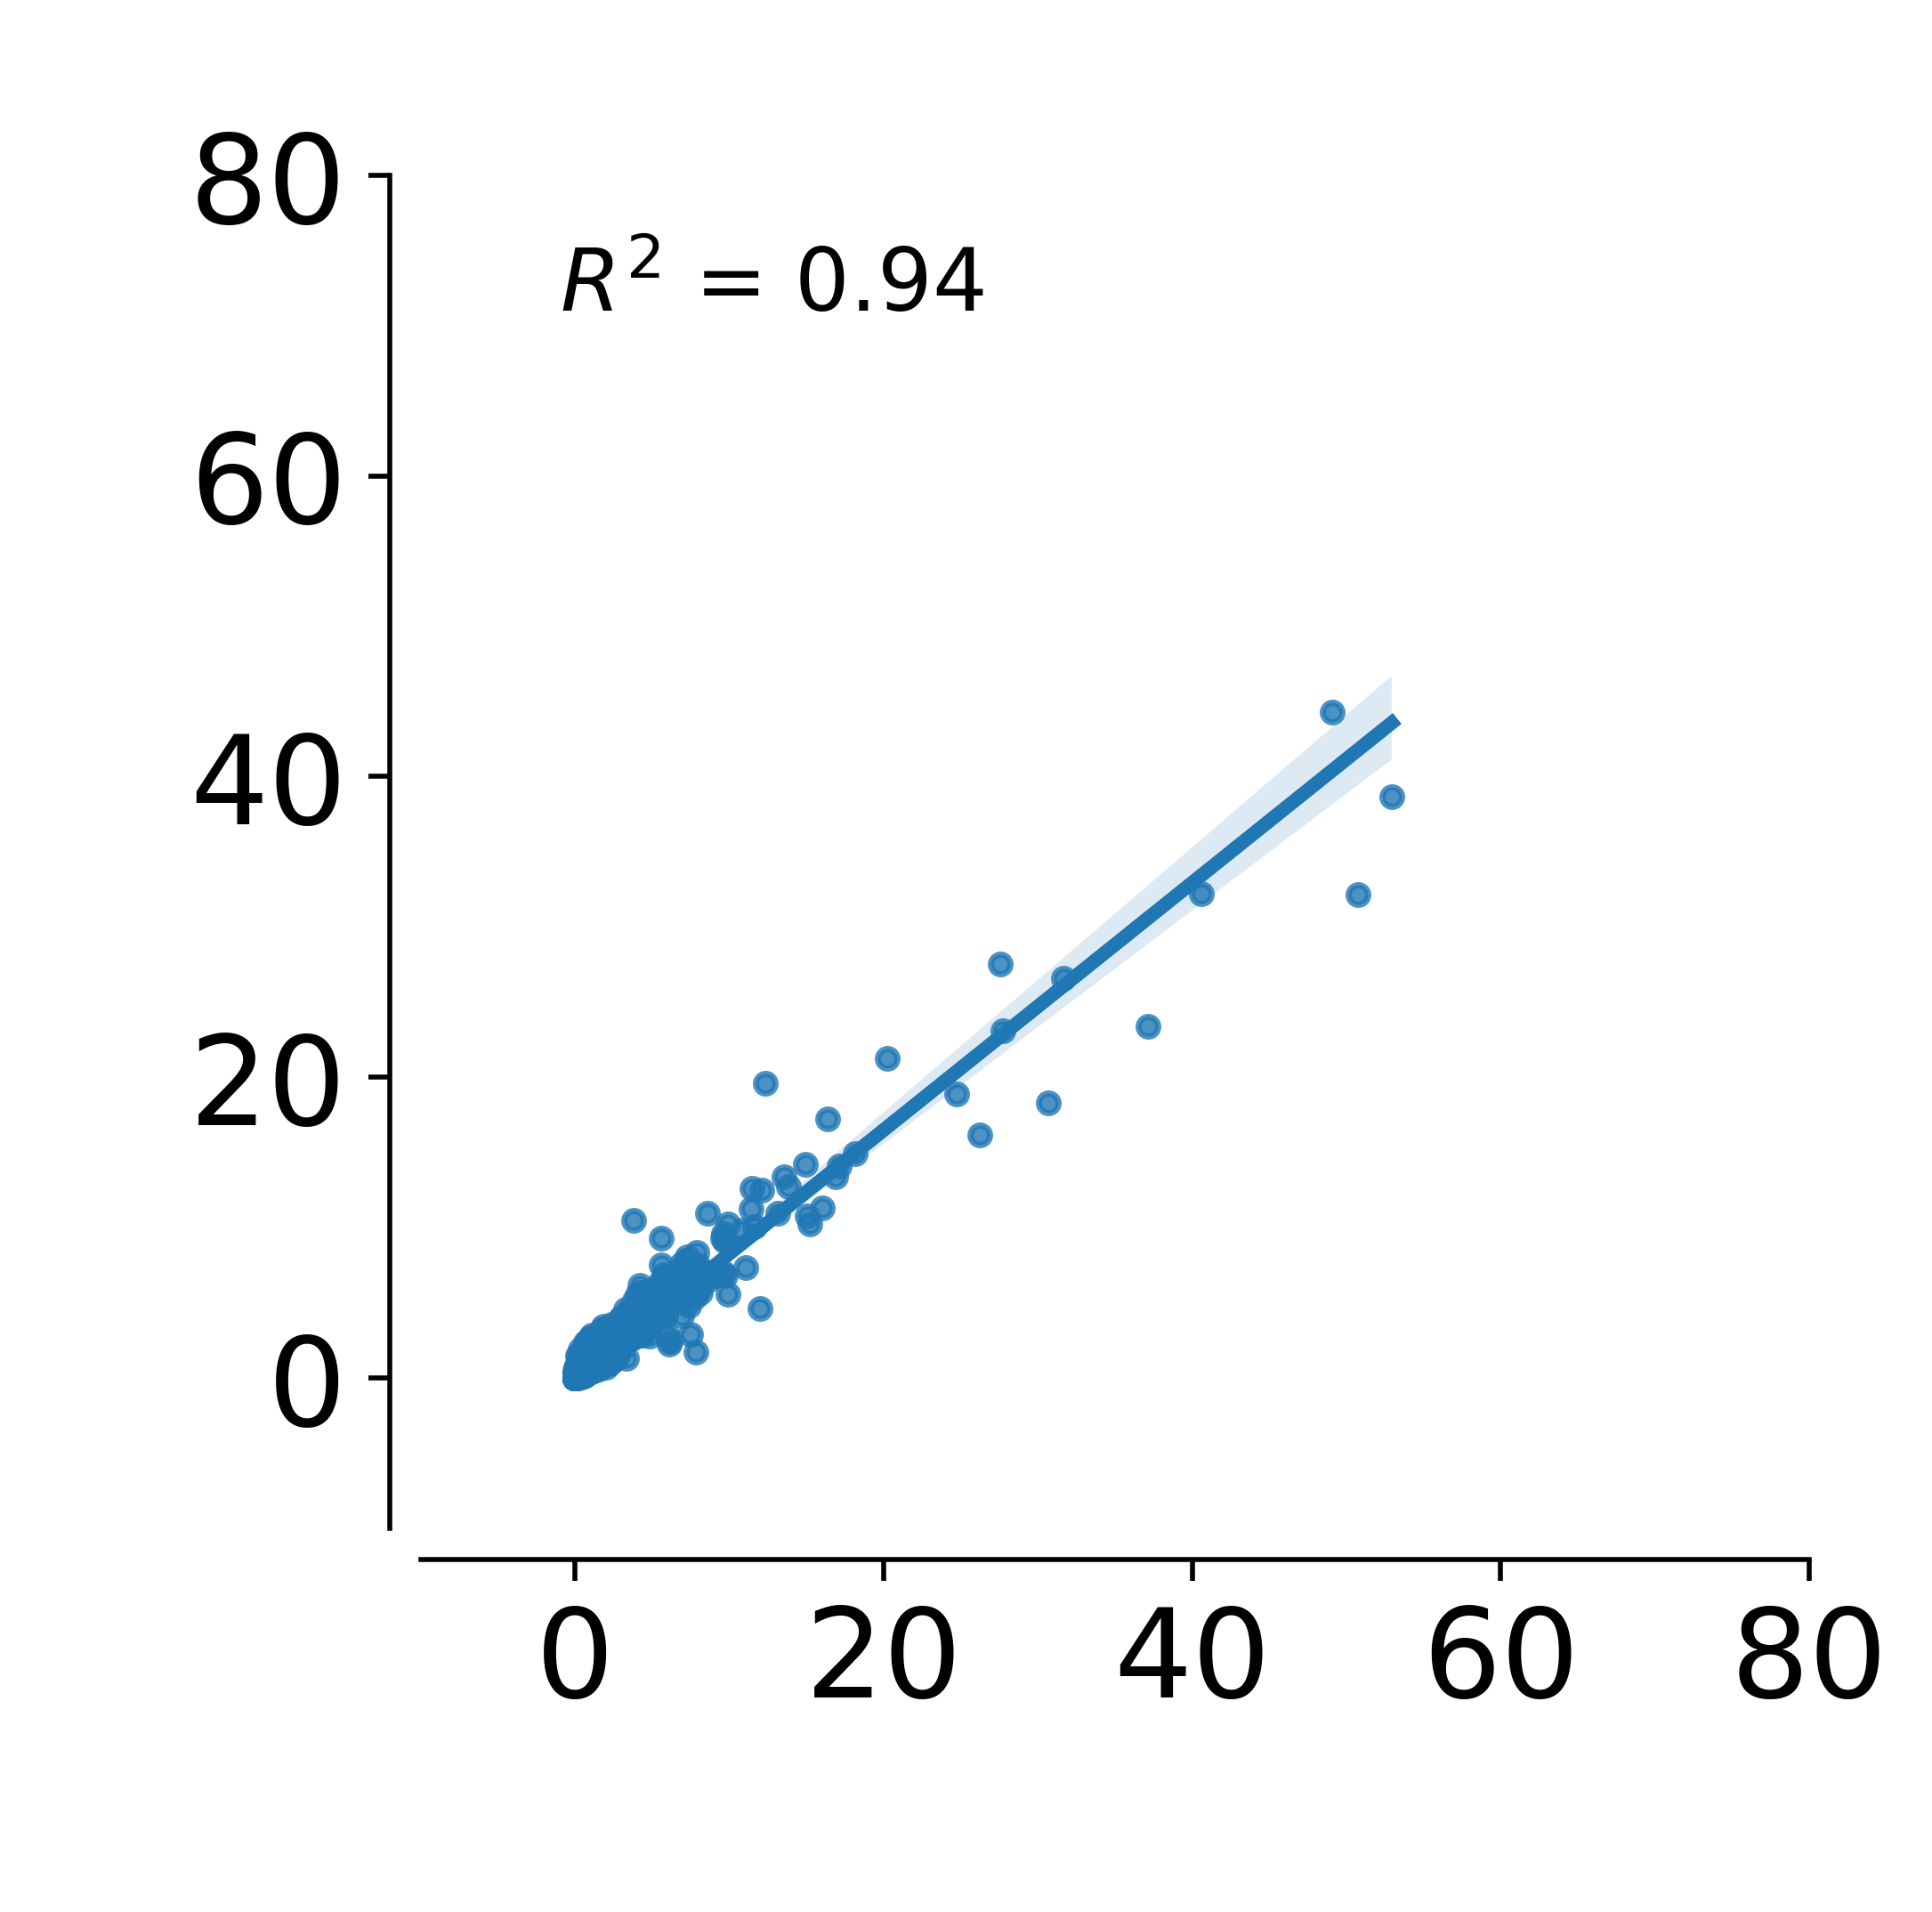

In [38]:
Plotting_Correlation_genes(VAE_flows_ecto_b," ")

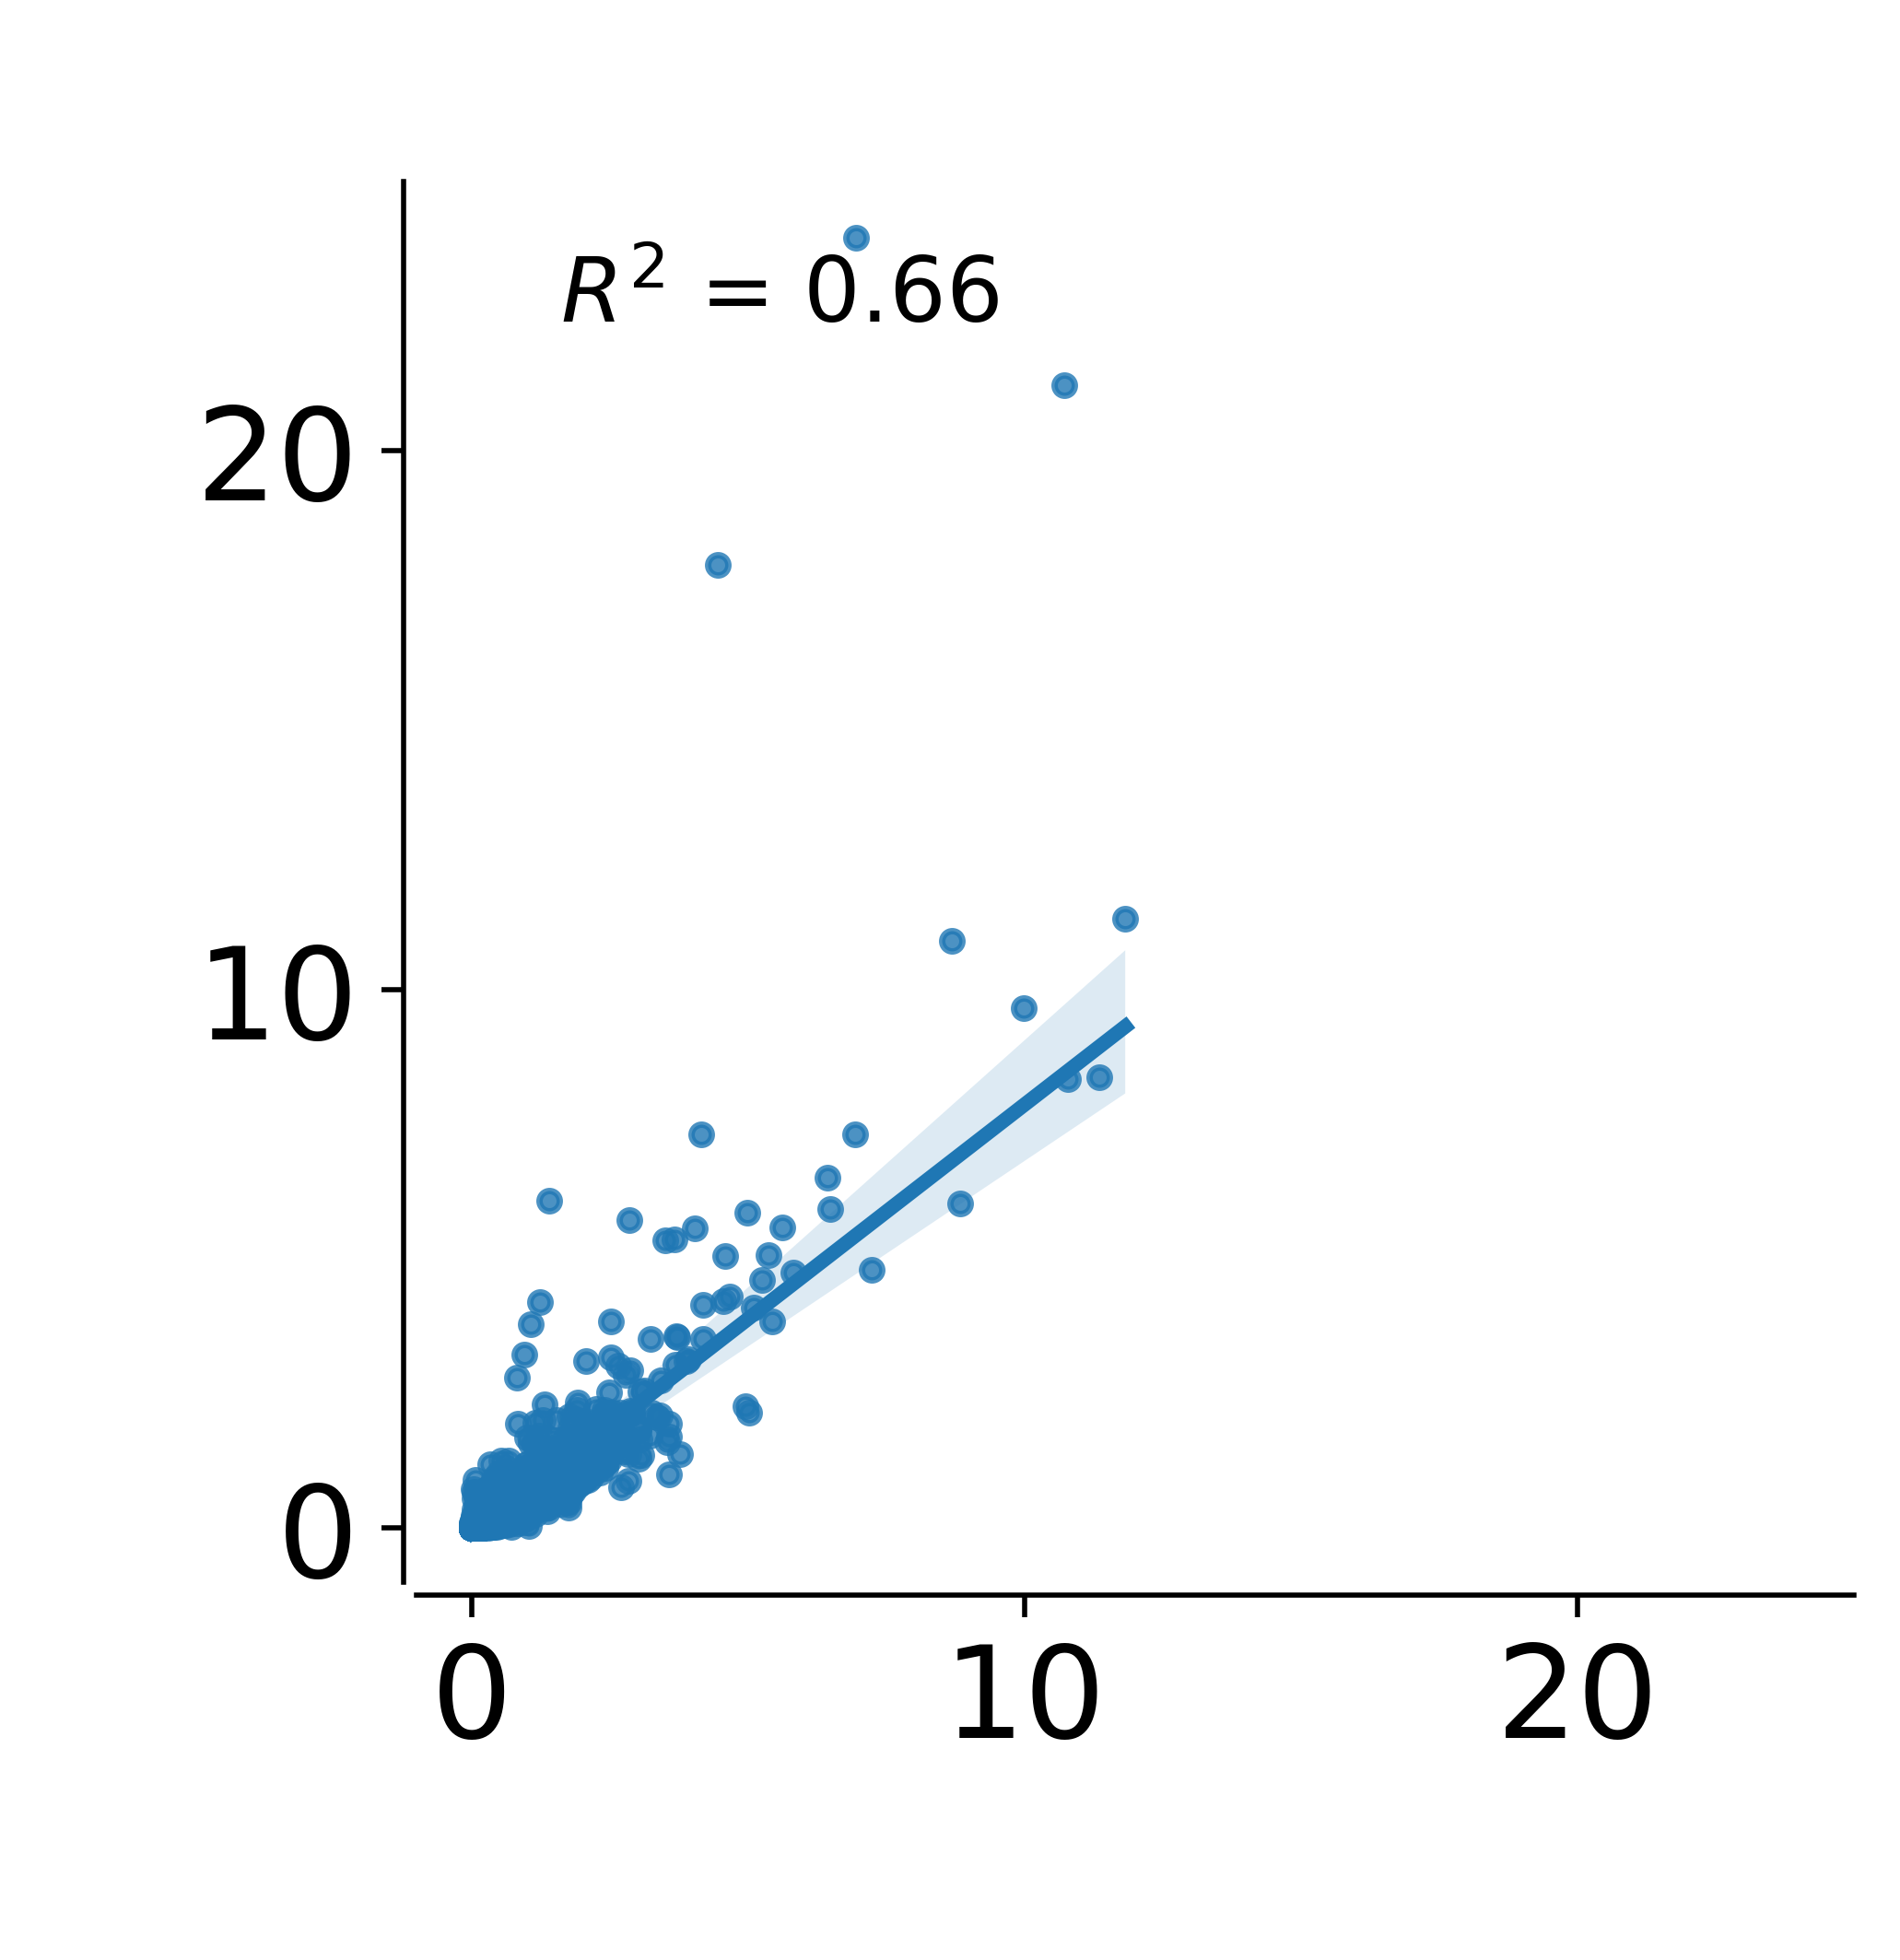

In [39]:
Plotting_Correlation_var(VAE_flows_ecto_b," ")

In [40]:
def Calculating_PCA(data_object):
	sc.tl.pca(data_object)


In [41]:
pca_pal_ = ["#1f77b4","grey","darkgrey"]


In [42]:
a = VAE_flows_ecto_b[VAE_flows_ecto_b.obs["cells"] == 'Predicted data']
b = VAE_flows_ecto_b[VAE_flows_ecto_b.obs["cells"] == 'Real data']
c = VAE_flows_ecto_b[VAE_flows_ecto_b.obs["cells"] == 'Test data']

In [43]:
a.obs["data"] = "1"
b.obs["data"] = "2"
c.obs["data"] = "3"

/tmp/ipykernel_31307/4028571403.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  a.obs["data"] = "1"
/tmp/ipykernel_31307/4028571403.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  b.obs["data"] = "2"
/tmp/ipykernel_31307/4028571403.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  c.obs["data"] = "3"


In [44]:
obj = a.concatenate(b,c)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [45]:
obj

AnnData object with n_obs × n_vars = 7738 × 17238
    obs: 'cells', 'n.Genes', 'n.Trans', 'CELL', 'STAGE', 'GENO', 'BATCH', 'SEQ', 'HPF', 'SAMPLE', 'NUM_READS', 'NUM_TRANSCRIPTS', 'NUM_GENES', 'MT_TRANSCRIPTS', 'PERCENT_MT', 'stage.nice', 'segment', 'node', 'pseudotime', 'n_genes', 'n_counts', 'batch', 'data'
    var: 'n_cells-1', 'n_cells-2'
    obsm: 'X_pca'

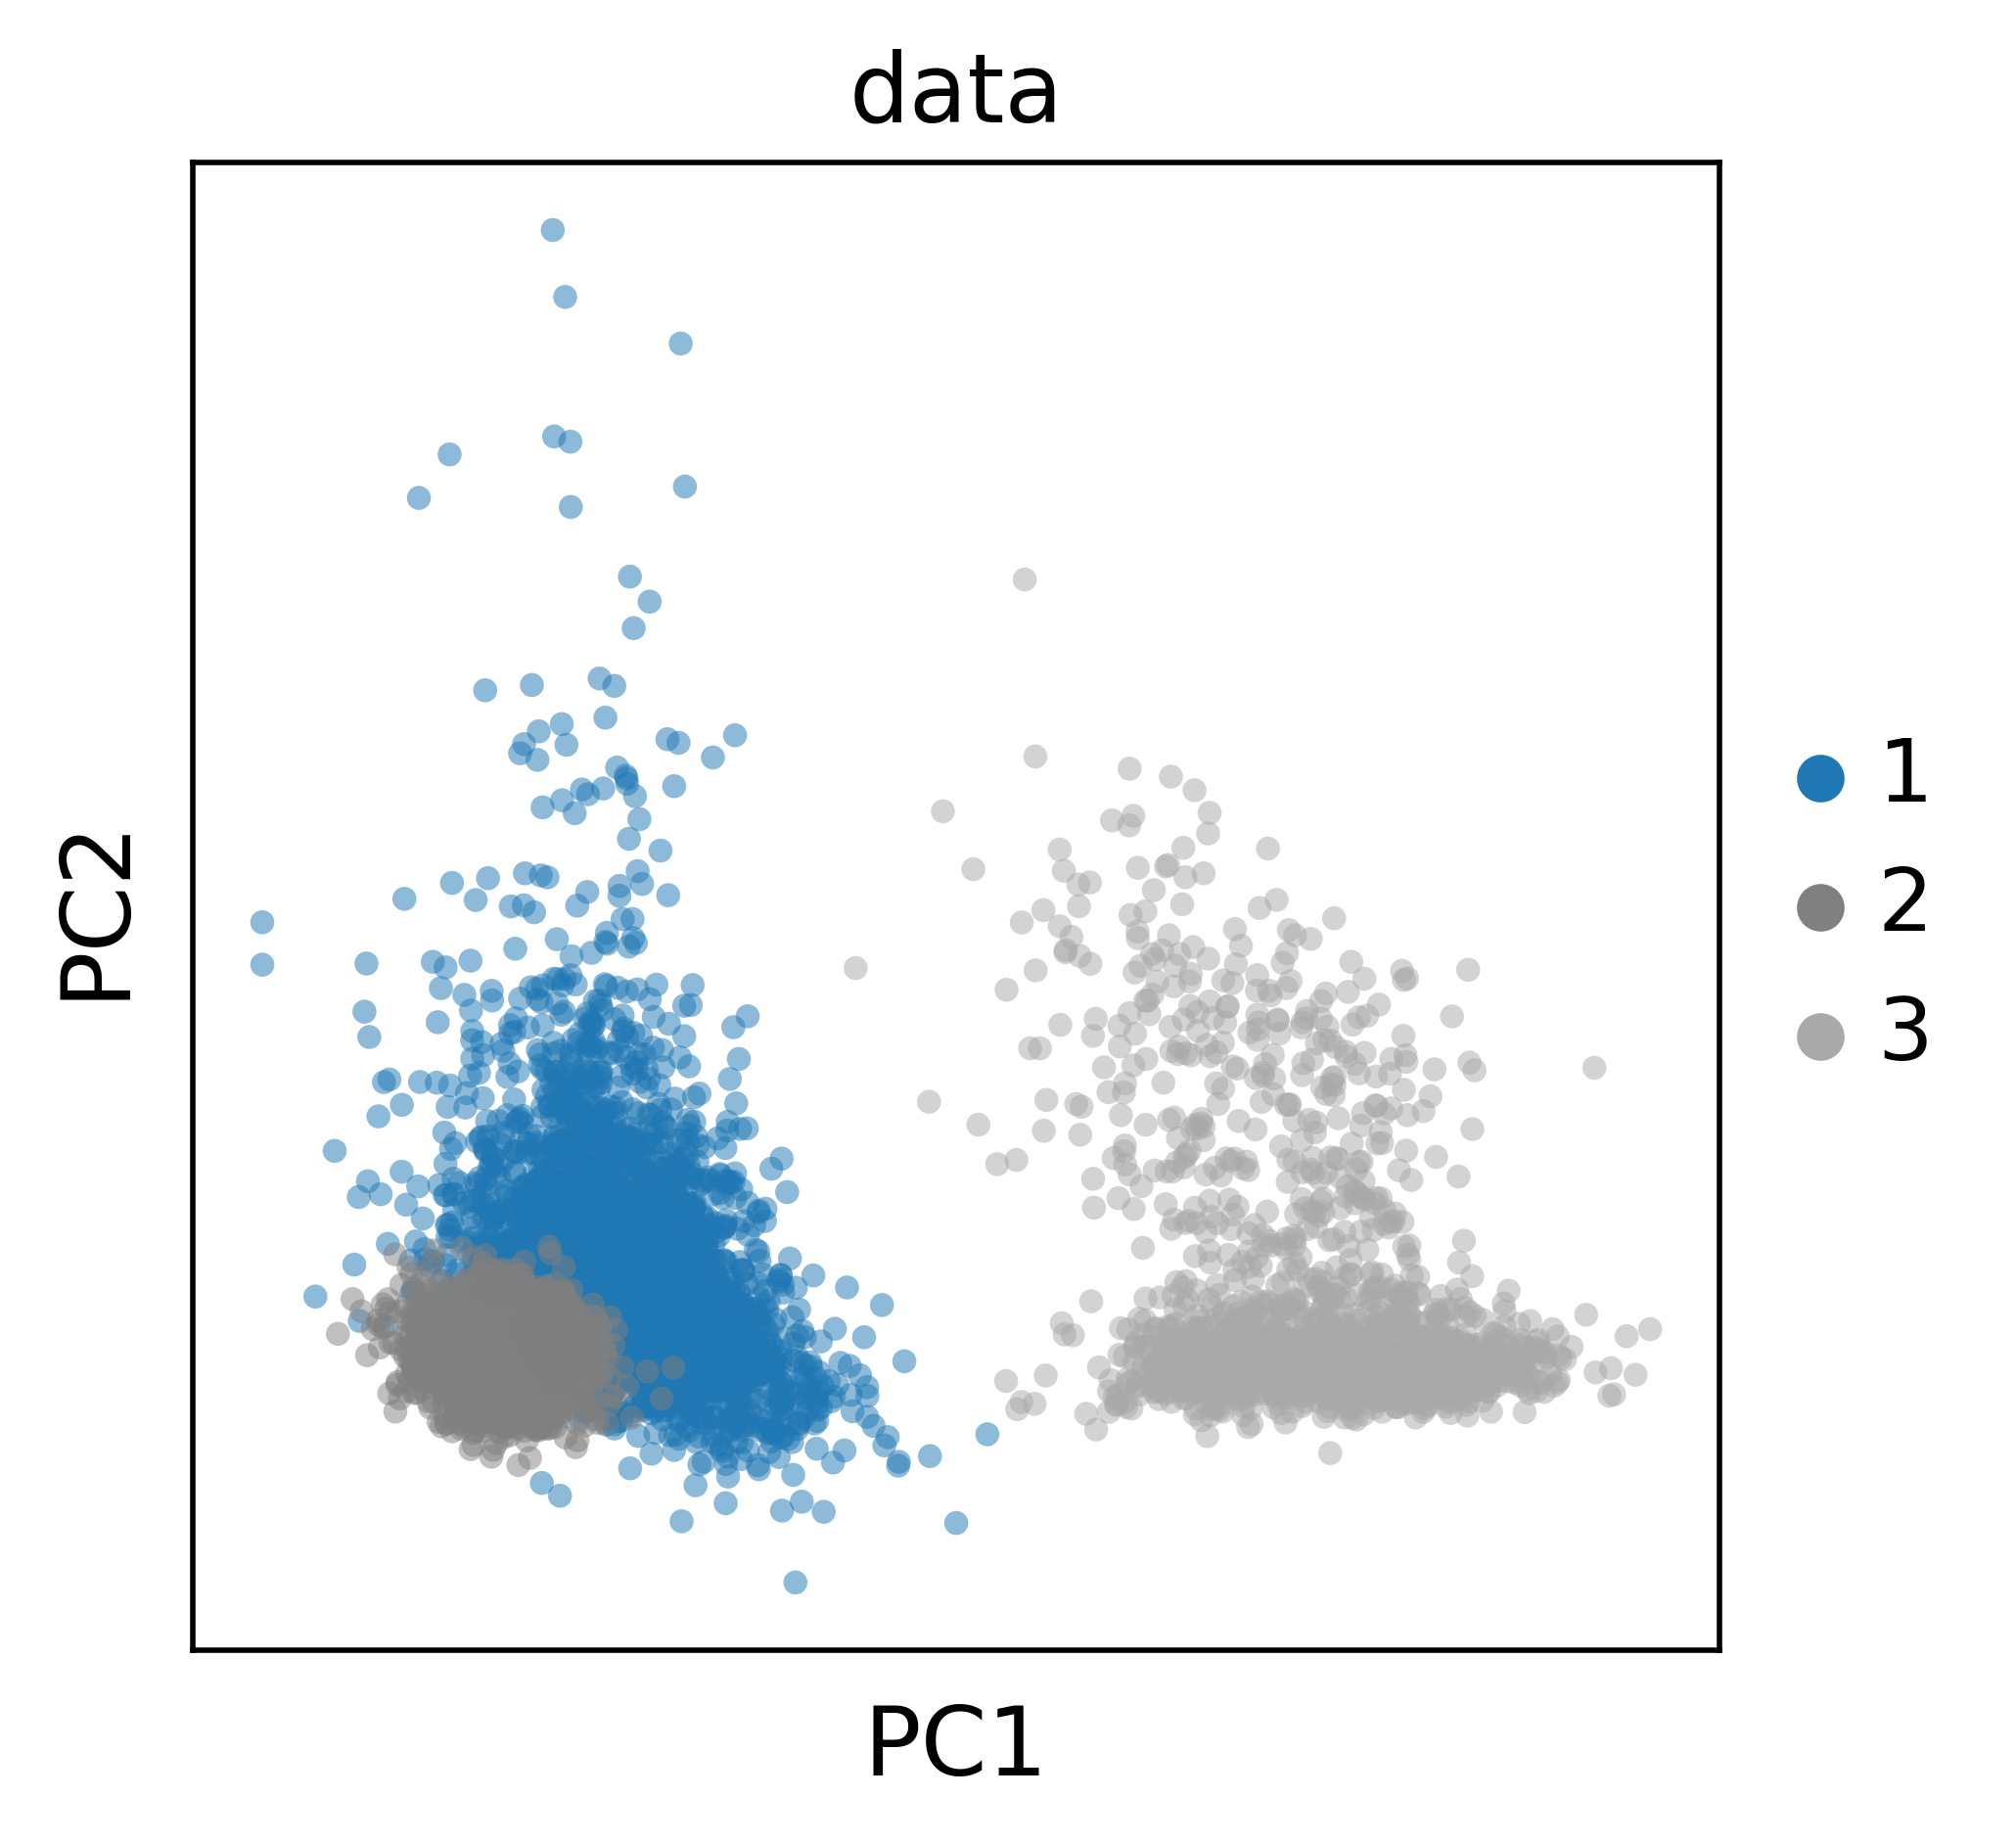

In [46]:
sc.pl.pca(obj, color="data",size=50,alpha = 0.5,palette=pca_pal_,components=['1,2'])